In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

df=pd.read_csv('1806126.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200714710,SYSCO us,2019-12-04 00:00:00,2019.0,1.930150e+09,2019-11-18,20191113,20191118,20191208.0,USD,RV,1.0,NaN,276.02,20191118.0,NAD1,1.930150e+09,0
1,U001,0100016691,BAY us,2019-03-25 00:00:00,2019.0,1.928806e+09,2019-02-15,20190215,20190215,20190317.0,USD,RV,1.0,NaN,15842.40,20190215.0,NAD5,1.928806e+09,0
2,U001,0200515231,US systems,2019-12-06 00:00:00,2019.0,1.930173e+09,2019-11-19,20191120,20191119,20191204.0,USD,RV,1.0,NaN,46882.32,20191119.0,NAA8,1.930173e+09,0
3,U001,0200769623,WAL-MAR co,2019-10-23 00:00:00,2019.0,1.930008e+09,2019-10-13,20191013,20191013,20191028.0,USD,RV,1.0,NaN,27531.85,20191013.0,NAH4,1.930008e+09,0
4,U001,0200780383,MEIJ associates,2019-04-08 00:00:00,2019.0,1.929006e+09,2019-03-23,20190321,20190323,20190407.0,USD,RV,1.0,NaN,16200.10,20190323.0,NAA8,1.929006e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200704858,WAKE corporation,NaN,2020.0,1.930617e+09,2020-03-07,20200306,20200307,20200322.0,USD,RV,1.0,NaN,65871.47,20200307.0,NAA8,1.930617e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930752e+09,2020-04-05,20200406,20200405,20200609.0,USD,RV,1.0,NaN,46.98,20200405.0,NAGD,1.930752e+09,1
49997,U001,0200762301,C&S WH systems,NaN,2020.0,1.930666e+09,2020-03-18,20200318,20200318,20200402.0,USD,RV,1.0,NaN,61818.39,20200318.0,NAC6,1.930666e+09,1
49998,U001,0200778870,C corporation,NaN,2020.0,1.930664e+09,2020-03-18,20200317,20200318,20200402.0,USD,RV,1.0,NaN,31079.80,20200318.0,NAA8,1.930664e+09,1


In [2]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3585
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

###### Converting date variable object to datetime

In [3]:
df1=df.drop(['area_business'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46415 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  total_open_amount       50000 non-null  float64
 14  baseline_create_date    50000 non-null

In [4]:
# as we can see all the date containing variables are object type so convert it to datetime
df1['document_create_date'] = pd.to_datetime(df1['document_create_date'], format='%Y%m%d')
df1['document_create_date.1'] = pd.to_datetime(df1['document_create_date.1'], format='%Y%m%d')
df1['due_in_date'] = pd.to_datetime(df1['due_in_date'], format='%Y%m%d')
df1['baseline_create_date'] = pd.to_datetime(df1['baseline_create_date'], format='%Y%m%d')
df1['posting_date'] = pd.to_datetime(df1['posting_date'], infer_datetime_format=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              46415 non-null  object        
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

In [5]:
# as we can see that all the date variables are converted to datetime except clear date as it contain time data too
# so we will change it too
df1['clear_date'] = pd.to_datetime(df1['clear_date']).dt.date
df1['clear_date'] = pd.to_datetime(df1['clear_date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              46415 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

In [6]:
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200714710,SYSCO us,2019-12-04,2019.0,1.930150e+09,2019-11-18,2019-11-13,2019-11-18,2019-12-08,USD,RV,1.0,276.02,2019-11-18,NAD1,1.930150e+09,0
1,U001,0100016691,BAY us,2019-03-25,2019.0,1.928806e+09,2019-02-15,2019-02-15,2019-02-15,2019-03-17,USD,RV,1.0,15842.40,2019-02-15,NAD5,1.928806e+09,0
2,U001,0200515231,US systems,2019-12-06,2019.0,1.930173e+09,2019-11-19,2019-11-20,2019-11-19,2019-12-04,USD,RV,1.0,46882.32,2019-11-19,NAA8,1.930173e+09,0
3,U001,0200769623,WAL-MAR co,2019-10-23,2019.0,1.930008e+09,2019-10-13,2019-10-13,2019-10-13,2019-10-28,USD,RV,1.0,27531.85,2019-10-13,NAH4,1.930008e+09,0
4,U001,0200780383,MEIJ associates,2019-04-08,2019.0,1.929006e+09,2019-03-23,2019-03-21,2019-03-23,2019-04-07,USD,RV,1.0,16200.10,2019-03-23,NAA8,1.929006e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200704858,WAKE corporation,NaT,2020.0,1.930617e+09,2020-03-07,2020-03-06,2020-03-07,2020-03-22,USD,RV,1.0,65871.47,2020-03-07,NAA8,1.930617e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930752e+09,2020-04-05,2020-04-06,2020-04-05,2020-06-09,USD,RV,1.0,46.98,2020-04-05,NAGD,1.930752e+09,1
49997,U001,0200762301,C&S WH systems,NaT,2020.0,1.930666e+09,2020-03-18,2020-03-18,2020-03-18,2020-04-02,USD,RV,1.0,61818.39,2020-03-18,NAC6,1.930666e+09,1
49998,U001,0200778870,C corporation,NaT,2020.0,1.930664e+09,2020-03-18,2020-03-17,2020-03-18,2020-04-02,USD,RV,1.0,31079.80,2020-03-18,NAA8,1.930664e+09,1


# Removing Constant variables

In [7]:
df1.nunique(axis=0) 

business_code                 6
cust_number                1425
name_customer              4300
clear_date                  398
buisness_year                 2
doc_id                    50000
posting_date                503
document_create_date        504
document_create_date.1      504
due_in_date                 541
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         45104
baseline_create_date        508
cust_payment_terms           73
invoice_id                49994
isOpen                        2
dtype: int64

In [8]:
# here we can see that posting id has only one unique value so we can drop this var as it will be of no use
df1=df1.drop(['posting_id'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              46415 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  total_open_amount       50000 non-null  float6

# Visualising different variables

In [9]:
df1.buisness_year.value_counts()

2019.0    40353
2020.0     9647
Name: buisness_year, dtype: int64

<AxesSubplot:xlabel='buisness_year', ylabel='isOpen'>

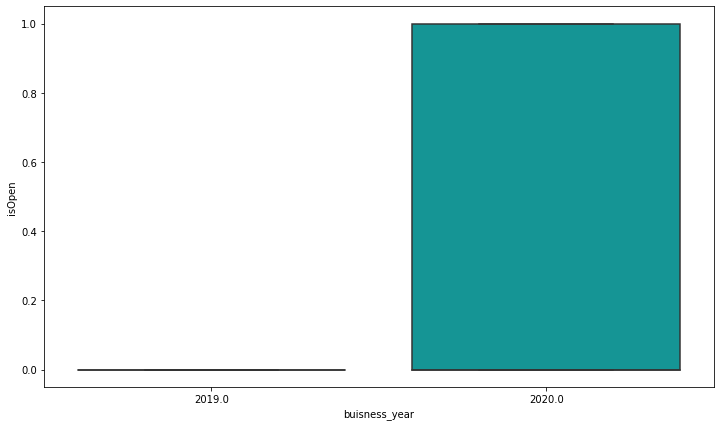

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='buisness_year',y='isOpen',data=df1,palette='winter')

In [11]:
# as we can see that all the payments yet to done are of 2020 so this will not help in training our data so we drop it
df1=df1.drop(['buisness_year'],axis=1)
df1

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200714710,SYSCO us,2019-12-04,1.930150e+09,2019-11-18,2019-11-13,2019-11-18,2019-12-08,USD,RV,276.02,2019-11-18,NAD1,1.930150e+09,0
1,U001,0100016691,BAY us,2019-03-25,1.928806e+09,2019-02-15,2019-02-15,2019-02-15,2019-03-17,USD,RV,15842.40,2019-02-15,NAD5,1.928806e+09,0
2,U001,0200515231,US systems,2019-12-06,1.930173e+09,2019-11-19,2019-11-20,2019-11-19,2019-12-04,USD,RV,46882.32,2019-11-19,NAA8,1.930173e+09,0
3,U001,0200769623,WAL-MAR co,2019-10-23,1.930008e+09,2019-10-13,2019-10-13,2019-10-13,2019-10-28,USD,RV,27531.85,2019-10-13,NAH4,1.930008e+09,0
4,U001,0200780383,MEIJ associates,2019-04-08,1.929006e+09,2019-03-23,2019-03-21,2019-03-23,2019-04-07,USD,RV,16200.10,2019-03-23,NAA8,1.929006e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200704858,WAKE corporation,NaT,1.930617e+09,2020-03-07,2020-03-06,2020-03-07,2020-03-22,USD,RV,65871.47,2020-03-07,NAA8,1.930617e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaT,1.930752e+09,2020-04-05,2020-04-06,2020-04-05,2020-06-09,USD,RV,46.98,2020-04-05,NAGD,1.930752e+09,1
49997,U001,0200762301,C&S WH systems,NaT,1.930666e+09,2020-03-18,2020-03-18,2020-03-18,2020-04-02,USD,RV,61818.39,2020-03-18,NAC6,1.930666e+09,1
49998,U001,0200778870,C corporation,NaT,1.930664e+09,2020-03-18,2020-03-17,2020-03-18,2020-04-02,USD,RV,31079.80,2020-03-18,NAA8,1.930664e+09,1


In [12]:
df1.invoice_currency.value_counts()

USD    46115
CAD     3885
Name: invoice_currency, dtype: int64

In [13]:
# since there are very few values that have CAD values so we convert CAD into USD and drop this var
def convert(arr):
    if(arr['invoice_currency']=='CAD'):
        arr['total_open_amount']=arr['total_open_amount'] * 0.79
    return arr
df1=df1.apply(convert,axis='columns')
df1


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200714710,SYSCO us,2019-12-04,1.930150e+09,2019-11-18,2019-11-13,2019-11-18,2019-12-08,USD,RV,276.02,2019-11-18,NAD1,1.930150e+09,0
1,U001,0100016691,BAY us,2019-03-25,1.928806e+09,2019-02-15,2019-02-15,2019-02-15,2019-03-17,USD,RV,15842.40,2019-02-15,NAD5,1.928806e+09,0
2,U001,0200515231,US systems,2019-12-06,1.930173e+09,2019-11-19,2019-11-20,2019-11-19,2019-12-04,USD,RV,46882.32,2019-11-19,NAA8,1.930173e+09,0
3,U001,0200769623,WAL-MAR co,2019-10-23,1.930008e+09,2019-10-13,2019-10-13,2019-10-13,2019-10-28,USD,RV,27531.85,2019-10-13,NAH4,1.930008e+09,0
4,U001,0200780383,MEIJ associates,2019-04-08,1.929006e+09,2019-03-23,2019-03-21,2019-03-23,2019-04-07,USD,RV,16200.10,2019-03-23,NAA8,1.929006e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200704858,WAKE corporation,NaT,1.930617e+09,2020-03-07,2020-03-06,2020-03-07,2020-03-22,USD,RV,65871.47,2020-03-07,NAA8,1.930617e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaT,1.930752e+09,2020-04-05,2020-04-06,2020-04-05,2020-06-09,USD,RV,46.98,2020-04-05,NAGD,1.930752e+09,1
49997,U001,0200762301,C&S WH systems,NaT,1.930666e+09,2020-03-18,2020-03-18,2020-03-18,2020-04-02,USD,RV,61818.39,2020-03-18,NAC6,1.930666e+09,1
49998,U001,0200778870,C corporation,NaT,1.930664e+09,2020-03-18,2020-03-17,2020-03-18,2020-04-02,USD,RV,31079.80,2020-03-18,NAA8,1.930664e+09,1


In [14]:
df1=df1.drop(['invoice_currency'],axis=1)
df1

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200714710,SYSCO us,2019-12-04,1.930150e+09,2019-11-18,2019-11-13,2019-11-18,2019-12-08,RV,276.02,2019-11-18,NAD1,1.930150e+09,0
1,U001,0100016691,BAY us,2019-03-25,1.928806e+09,2019-02-15,2019-02-15,2019-02-15,2019-03-17,RV,15842.40,2019-02-15,NAD5,1.928806e+09,0
2,U001,0200515231,US systems,2019-12-06,1.930173e+09,2019-11-19,2019-11-20,2019-11-19,2019-12-04,RV,46882.32,2019-11-19,NAA8,1.930173e+09,0
3,U001,0200769623,WAL-MAR co,2019-10-23,1.930008e+09,2019-10-13,2019-10-13,2019-10-13,2019-10-28,RV,27531.85,2019-10-13,NAH4,1.930008e+09,0
4,U001,0200780383,MEIJ associates,2019-04-08,1.929006e+09,2019-03-23,2019-03-21,2019-03-23,2019-04-07,RV,16200.10,2019-03-23,NAA8,1.929006e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200704858,WAKE corporation,NaT,1.930617e+09,2020-03-07,2020-03-06,2020-03-07,2020-03-22,RV,65871.47,2020-03-07,NAA8,1.930617e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaT,1.930752e+09,2020-04-05,2020-04-06,2020-04-05,2020-06-09,RV,46.98,2020-04-05,NAGD,1.930752e+09,1
49997,U001,0200762301,C&S WH systems,NaT,1.930666e+09,2020-03-18,2020-03-18,2020-03-18,2020-04-02,RV,61818.39,2020-03-18,NAC6,1.930666e+09,1
49998,U001,0200778870,C corporation,NaT,1.930664e+09,2020-03-18,2020-03-17,2020-03-18,2020-04-02,RV,31079.80,2020-03-18,NAA8,1.930664e+09,1


In [15]:
# since there are two document create date so we will keep the normalized form
df1=df1.drop(['document_create_date'],axis=1)
df1

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200714710,SYSCO us,2019-12-04,1.930150e+09,2019-11-18,2019-11-18,2019-12-08,RV,276.02,2019-11-18,NAD1,1.930150e+09,0
1,U001,0100016691,BAY us,2019-03-25,1.928806e+09,2019-02-15,2019-02-15,2019-03-17,RV,15842.40,2019-02-15,NAD5,1.928806e+09,0
2,U001,0200515231,US systems,2019-12-06,1.930173e+09,2019-11-19,2019-11-19,2019-12-04,RV,46882.32,2019-11-19,NAA8,1.930173e+09,0
3,U001,0200769623,WAL-MAR co,2019-10-23,1.930008e+09,2019-10-13,2019-10-13,2019-10-28,RV,27531.85,2019-10-13,NAH4,1.930008e+09,0
4,U001,0200780383,MEIJ associates,2019-04-08,1.929006e+09,2019-03-23,2019-03-23,2019-04-07,RV,16200.10,2019-03-23,NAA8,1.929006e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200704858,WAKE corporation,NaT,1.930617e+09,2020-03-07,2020-03-07,2020-03-22,RV,65871.47,2020-03-07,NAA8,1.930617e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaT,1.930752e+09,2020-04-05,2020-04-05,2020-06-09,RV,46.98,2020-04-05,NAGD,1.930752e+09,1
49997,U001,0200762301,C&S WH systems,NaT,1.930666e+09,2020-03-18,2020-03-18,2020-04-02,RV,61818.39,2020-03-18,NAC6,1.930666e+09,1
49998,U001,0200778870,C corporation,NaT,1.930664e+09,2020-03-18,2020-03-18,2020-04-02,RV,31079.80,2020-03-18,NAA8,1.930664e+09,1


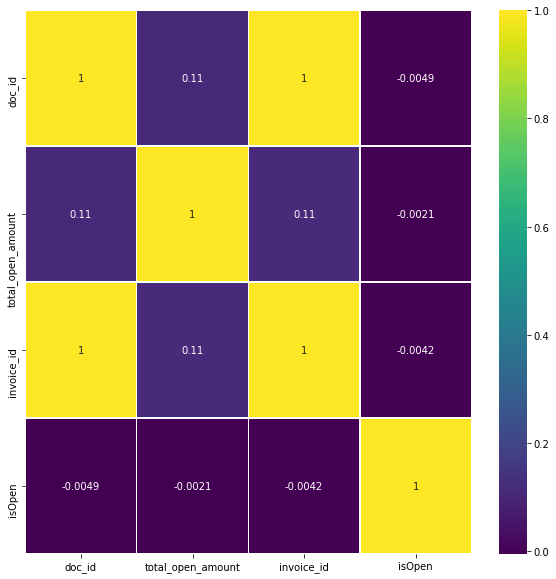

In [16]:
corremat = df1.corr()
plt.figure(figsize=(10,10))
g= sns.heatmap(df1.corr(),annot=True,cmap='viridis',linewidths=.5)

In [17]:
# doc_id and invoice_id had correlation 1 
df1=df1.drop(['invoice_id'],axis=1)
df1

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200714710,SYSCO us,2019-12-04,1.930150e+09,2019-11-18,2019-11-18,2019-12-08,RV,276.02,2019-11-18,NAD1,0
1,U001,0100016691,BAY us,2019-03-25,1.928806e+09,2019-02-15,2019-02-15,2019-03-17,RV,15842.40,2019-02-15,NAD5,0
2,U001,0200515231,US systems,2019-12-06,1.930173e+09,2019-11-19,2019-11-19,2019-12-04,RV,46882.32,2019-11-19,NAA8,0
3,U001,0200769623,WAL-MAR co,2019-10-23,1.930008e+09,2019-10-13,2019-10-13,2019-10-28,RV,27531.85,2019-10-13,NAH4,0
4,U001,0200780383,MEIJ associates,2019-04-08,1.929006e+09,2019-03-23,2019-03-23,2019-04-07,RV,16200.10,2019-03-23,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200704858,WAKE corporation,NaT,1.930617e+09,2020-03-07,2020-03-07,2020-03-22,RV,65871.47,2020-03-07,NAA8,1
49996,U001,0200769623,WAL-MAR corporation,NaT,1.930752e+09,2020-04-05,2020-04-05,2020-06-09,RV,46.98,2020-04-05,NAGD,1
49997,U001,0200762301,C&S WH systems,NaT,1.930666e+09,2020-03-18,2020-03-18,2020-04-02,RV,61818.39,2020-03-18,NAC6,1
49998,U001,0200778870,C corporation,NaT,1.930664e+09,2020-03-18,2020-03-18,2020-04-02,RV,31079.80,2020-03-18,NAA8,1


In [18]:
df1=df1.drop(['doc_id'],axis=1)
df1

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200714710,SYSCO us,2019-12-04,2019-11-18,2019-11-18,2019-12-08,RV,276.02,2019-11-18,NAD1,0
1,U001,0100016691,BAY us,2019-03-25,2019-02-15,2019-02-15,2019-03-17,RV,15842.40,2019-02-15,NAD5,0
2,U001,0200515231,US systems,2019-12-06,2019-11-19,2019-11-19,2019-12-04,RV,46882.32,2019-11-19,NAA8,0
3,U001,0200769623,WAL-MAR co,2019-10-23,2019-10-13,2019-10-13,2019-10-28,RV,27531.85,2019-10-13,NAH4,0
4,U001,0200780383,MEIJ associates,2019-04-08,2019-03-23,2019-03-23,2019-04-07,RV,16200.10,2019-03-23,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200704858,WAKE corporation,NaT,2020-03-07,2020-03-07,2020-03-22,RV,65871.47,2020-03-07,NAA8,1
49996,U001,0200769623,WAL-MAR corporation,NaT,2020-04-05,2020-04-05,2020-06-09,RV,46.98,2020-04-05,NAGD,1
49997,U001,0200762301,C&S WH systems,NaT,2020-03-18,2020-03-18,2020-04-02,RV,61818.39,2020-03-18,NAC6,1
49998,U001,0200778870,C corporation,NaT,2020-03-18,2020-03-18,2020-04-02,RV,31079.80,2020-03-18,NAA8,1


In [19]:
df1 = df1.sort_values(by=['baseline_create_date'])

In [20]:
df1

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
2510,CA02,0140104409,LOB co,2019-05-31,2019-03-29,2018-10-24,2018-11-03,X2,693.9360,2018-10-24,CA10,0
36113,U001,0200756072,REINHA trust,2019-02-08,2019-02-08,2019-02-08,2018-12-06,RV,7209.0000,2018-11-21,NAA8,0
9116,U001,0200455322,PEA trust,2019-01-28,2019-01-09,2019-01-09,2019-01-13,RV,3311.6900,2018-12-14,NAD5,0
37098,U001,0200455322,PEA trust,2019-01-28,2019-01-15,2019-01-15,2019-01-18,RV,3064.0100,2018-12-19,NAD5,0
10870,U001,0200726979,BJ'S llc,2019-01-15,2018-12-30,2018-12-30,2019-01-14,RV,321.4100,2018-12-30,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47819,U001,0100036318,TFC us,NaT,2020-05-15,2020-05-15,2020-05-25,RV,4025.0000,2020-05-15,NA10,1
49838,U001,0200424504,M corp,NaT,2020-05-05,2020-05-05,2020-05-15,RV,353.4200,2020-05-15,NACH,1
49734,CA02,0140104240,FEDER trust,NaT,2020-05-08,2020-05-08,2020-05-27,RV,97269.7533,2020-05-17,CA10,1
48213,U001,0200765011,MAINES trust,NaT,2020-05-18,2020-05-18,2020-06-02,RV,27102.9400,2020-05-18,NAA8,1


In [21]:
# Extracting the test data
X_test=df1[df1['clear_date'].isnull()]
X_test

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
48869,U001,0200754118,ARMY in,NaT,2020-05-02,2020-05-02,2020-01-31,RV,126.5500,2020-01-16,NAM3,1
47199,U001,0200754118,ARMY corporation,NaT,2020-05-02,2020-05-02,2020-01-31,RV,67.8900,2020-01-16,NAM3,1
46563,U001,0200769623,WAL-MAR associates,NaT,2020-02-27,2020-02-27,2020-03-13,RV,53270.3300,2020-02-27,NAH4,1
48732,U001,0200148860,DOLLA systems,NaT,2020-02-27,2020-02-27,2020-05-02,RV,17207.8500,2020-02-27,NAGD,1
48420,U001,0200799367,MCL trust,NaT,2020-02-27,2020-02-27,2020-03-13,RV,7214.5900,2020-02-27,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
47819,U001,0100036318,TFC us,NaT,2020-05-15,2020-05-15,2020-05-25,RV,4025.0000,2020-05-15,NA10,1
49838,U001,0200424504,M corp,NaT,2020-05-05,2020-05-05,2020-05-15,RV,353.4200,2020-05-15,NACH,1
49734,CA02,0140104240,FEDER trust,NaT,2020-05-08,2020-05-08,2020-05-27,RV,97269.7533,2020-05-17,CA10,1
48213,U001,0200765011,MAINES trust,NaT,2020-05-18,2020-05-18,2020-06-02,RV,27102.9400,2020-05-18,NAA8,1


In [22]:
Y_test=X_test['clear_date']
Y_test

48869   NaT
47199   NaT
46563   NaT
48732   NaT
48420   NaT
         ..
47819   NaT
49838   NaT
49734   NaT
48213   NaT
49078   NaT
Name: clear_date, Length: 3585, dtype: datetime64[ns]

In [23]:
X_test=X_test.drop(['clear_date'],axis=1)
X_test

,business_code,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
48869,U001,0200754118,ARMY in,2020-05-02,2020-05-02,2020-01-31,RV,126.5500,2020-01-16,NAM3,1
47199,U001,0200754118,ARMY corporation,2020-05-02,2020-05-02,2020-01-31,RV,67.8900,2020-01-16,NAM3,1
46563,U001,0200769623,WAL-MAR associates,2020-02-27,2020-02-27,2020-03-13,RV,53270.3300,2020-02-27,NAH4,1
48732,U001,0200148860,DOLLA systems,2020-02-27,2020-02-27,2020-05-02,RV,17207.8500,2020-02-27,NAGD,1
48420,U001,0200799367,MCL trust,2020-02-27,2020-02-27,2020-03-13,RV,7214.5900,2020-02-27,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...
47819,U001,0100036318,TFC us,2020-05-15,2020-05-15,2020-05-25,RV,4025.0000,2020-05-15,NA10,1
49838,U001,0200424504,M corp,2020-05-05,2020-05-05,2020-05-15,RV,353.4200,2020-05-15,NACH,1
49734,CA02,0140104240,FEDER trust,2020-05-08,2020-05-08,2020-05-27,RV,97269.7533,2020-05-17,CA10,1
48213,U001,0200765011,MAINES trust,2020-05-18,2020-05-18,2020-06-02,RV,27102.9400,2020-05-18,NAA8,1


In [24]:
X_train=df1[df1['clear_date'].notnull()]
X_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
2510,CA02,0140104409,LOB co,2019-05-31,2019-03-29,2018-10-24,2018-11-03,X2,693.9360,2018-10-24,CA10,0
36113,U001,0200756072,REINHA trust,2019-02-08,2019-02-08,2019-02-08,2018-12-06,RV,7209.0000,2018-11-21,NAA8,0
9116,U001,0200455322,PEA trust,2019-01-28,2019-01-09,2019-01-09,2019-01-13,RV,3311.6900,2018-12-14,NAD5,0
37098,U001,0200455322,PEA trust,2019-01-28,2019-01-15,2019-01-15,2019-01-18,RV,3064.0100,2018-12-19,NAD5,0
10870,U001,0200726979,BJ'S llc,2019-01-15,2018-12-30,2018-12-30,2019-01-14,RV,321.4100,2018-12-30,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42021,CA02,0140104249,SOB in,2020-03-23,2020-02-25,2020-02-25,2020-03-14,RV,24606.1221,2020-03-04,CA10,0
30247,CA02,0140105847,GORDON F corp,2020-03-20,2020-02-26,2020-02-26,2020-03-15,RV,36626.0985,2020-03-05,CA10,0
36374,CA02,0140106293,ATLANT,2020-03-16,2020-02-26,2020-02-26,2020-03-16,RV,56.3586,2020-03-06,CA10,0
31179,CA02,0140104429,COSTCO trust,2020-03-23,2020-02-26,2020-02-26,2020-03-16,RV,28335.1038,2020-03-06,CA10,0


In [25]:
# Calculating delay
delay = X_train["clear_date"]-X_train["due_in_date"]
X_train['delay'] = delay.dt.days
X_train

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
2510,CA02,0140104409,LOB co,2019-05-31,2019-03-29,2018-10-24,2018-11-03,X2,693.9360,2018-10-24,CA10,0,209
36113,U001,0200756072,REINHA trust,2019-02-08,2019-02-08,2019-02-08,2018-12-06,RV,7209.0000,2018-11-21,NAA8,0,64
9116,U001,0200455322,PEA trust,2019-01-28,2019-01-09,2019-01-09,2019-01-13,RV,3311.6900,2018-12-14,NAD5,0,15
37098,U001,0200455322,PEA trust,2019-01-28,2019-01-15,2019-01-15,2019-01-18,RV,3064.0100,2018-12-19,NAD5,0,10
10870,U001,0200726979,BJ'S llc,2019-01-15,2018-12-30,2018-12-30,2019-01-14,RV,321.4100,2018-12-30,NAA8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,CA02,0140104249,SOB in,2020-03-23,2020-02-25,2020-02-25,2020-03-14,RV,24606.1221,2020-03-04,CA10,0,9
30247,CA02,0140105847,GORDON F corp,2020-03-20,2020-02-26,2020-02-26,2020-03-15,RV,36626.0985,2020-03-05,CA10,0,5
36374,CA02,0140106293,ATLANT,2020-03-16,2020-02-26,2020-02-26,2020-03-16,RV,56.3586,2020-03-06,CA10,0,0
31179,CA02,0140104429,COSTCO trust,2020-03-23,2020-02-26,2020-02-26,2020-03-16,RV,28335.1038,2020-03-06,CA10,0,7


In [26]:
X_train[X_train['document_create_date.1']>X_train['posting_date']].shape[0]

0

In [27]:
X_train[X_train['document_create_date.1']>X_train['baseline_create_date']].shape[0]

2069

In [28]:
X_train.drop(X_train[X_train['document_create_date.1']>X_train['baseline_create_date']].index, inplace = True) 
X_train

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
2510,CA02,0140104409,LOB co,2019-05-31,2019-03-29,2018-10-24,2018-11-03,X2,693.9360,2018-10-24,CA10,0,209
10870,U001,0200726979,BJ'S llc,2019-01-15,2018-12-30,2018-12-30,2019-01-14,RV,321.4100,2018-12-30,NAA8,0,1
18430,U001,0200759878,SA foundation,2019-01-15,2018-12-30,2018-12-30,2019-01-14,RV,14380.1600,2018-12-30,NAH4,0,1
21204,U001,0200726979,BJ'S,2019-01-15,2018-12-30,2018-12-30,2019-01-14,RV,165.9000,2018-12-30,NAA8,0,1
7872,U001,0200707822,PUBLI systems,2019-01-14,2018-12-30,2018-12-30,2019-01-14,RV,55772.1400,2018-12-30,NAA8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,CA02,0140104249,SOB in,2020-03-23,2020-02-25,2020-02-25,2020-03-14,RV,24606.1221,2020-03-04,CA10,0,9
30247,CA02,0140105847,GORDON F corp,2020-03-20,2020-02-26,2020-02-26,2020-03-15,RV,36626.0985,2020-03-05,CA10,0,5
36374,CA02,0140106293,ATLANT,2020-03-16,2020-02-26,2020-02-26,2020-03-16,RV,56.3586,2020-03-06,CA10,0,0
31179,CA02,0140104429,COSTCO trust,2020-03-23,2020-02-26,2020-02-26,2020-03-16,RV,28335.1038,2020-03-06,CA10,0,7


In [29]:
X_train[X_train['document_create_date.1']>X_train['baseline_create_date']].shape[0]

0

In [30]:
X_train[X_train['document_create_date.1']>X_train['clear_date']].shape[0]

0

In [31]:
X_train[X_train['document_create_date.1']>X_train['due_in_date']].shape[0]

0

In [32]:
X_train[X_train['posting_date']>X_train['baseline_create_date']].shape[0]

6

In [33]:
X_train.drop(X_train[X_train['posting_date']>X_train['baseline_create_date']].index, inplace = True) 
X_train

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
10870,U001,0200726979,BJ'S llc,2019-01-15,2018-12-30,2018-12-30,2019-01-14,RV,321.4100,2018-12-30,NAA8,0,1
18430,U001,0200759878,SA foundation,2019-01-15,2018-12-30,2018-12-30,2019-01-14,RV,14380.1600,2018-12-30,NAH4,0,1
21204,U001,0200726979,BJ'S,2019-01-15,2018-12-30,2018-12-30,2019-01-14,RV,165.9000,2018-12-30,NAA8,0,1
7872,U001,0200707822,PUBLI systems,2019-01-14,2018-12-30,2018-12-30,2019-01-14,RV,55772.1400,2018-12-30,NAA8,0,0
17383,U001,0200769623,WAL-MAR us,2019-01-10,2018-12-30,2018-12-30,2019-01-14,RV,4474.6900,2018-12-30,NAH4,0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,CA02,0140104249,SOB in,2020-03-23,2020-02-25,2020-02-25,2020-03-14,RV,24606.1221,2020-03-04,CA10,0,9
30247,CA02,0140105847,GORDON F corp,2020-03-20,2020-02-26,2020-02-26,2020-03-15,RV,36626.0985,2020-03-05,CA10,0,5
36374,CA02,0140106293,ATLANT,2020-03-16,2020-02-26,2020-02-26,2020-03-16,RV,56.3586,2020-03-06,CA10,0,0
31179,CA02,0140104429,COSTCO trust,2020-03-23,2020-02-26,2020-02-26,2020-03-16,RV,28335.1038,2020-03-06,CA10,0,7


In [34]:
X_train[X_train['posting_date']>X_train['baseline_create_date']].shape[0]

0

In [35]:
X_train[X_train['posting_date']>X_train['due_in_date']].shape[0]

0

In [36]:
X_train[X_train['posting_date']>X_train['clear_date']].shape[0]

0

In [37]:
X_train[X_train['baseline_create_date']>X_train['clear_date']].shape[0]

3

In [38]:
X_train.drop(X_train[X_train['baseline_create_date']>X_train['clear_date']].index, inplace = True) 
X_train[X_train['baseline_create_date']>X_train['clear_date']].shape[0]

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


0

In [39]:
X_train[X_train['baseline_create_date']>X_train['due_in_date']].shape[0]

0

In [40]:
X_train['document type'].unique()

array(['RV'], dtype=object)

In [41]:
X_train=X_train.drop(['document type'],axis=1)
X_test=X_test.drop(['document type'],axis=1)


In [42]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'posting_date', 'document_create_date.1', 'due_in_date',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'isOpen', 'delay'],
      dtype='object')

# OUTLIER DETECTION

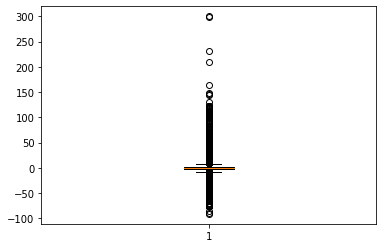

In [43]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.boxplot(X_train['delay'])
plt.show()

In [44]:
from scipy import stats
X_train=X_train[(np.abs(stats.zscore(X_train['delay'])) < 10)]

In [45]:
X_train.shape

(44305, 12)

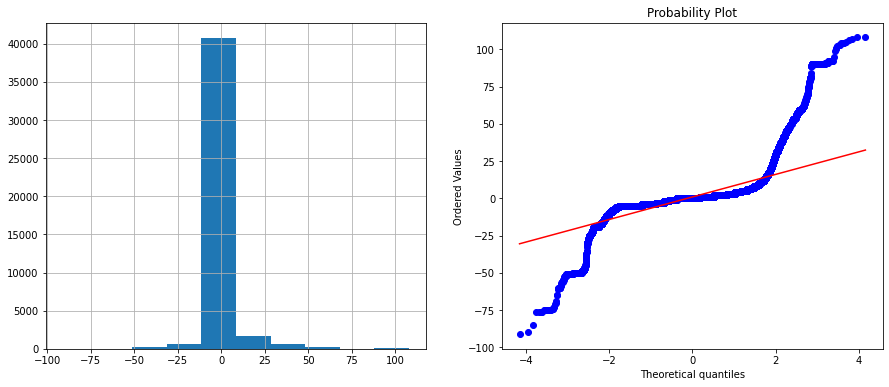

In [46]:
import pylab
def diagnostic_plots(data, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(X_train, 'delay')

In [47]:
mainX_train=X_train[X_train['document_create_date.1'] <= '2019-10-31']
mainX_train.shape

(33716, 12)

In [48]:
X_val1=X_train[X_train['document_create_date.1'] >= '2019-11-01'] 
X_val1.shape

(10589, 12)

In [49]:
X_val2=X_val1[X_val1['document_create_date.1'] >= '2019-12-1']
X_val2.shape

(7423, 12)

In [50]:
X_val1.drop(X_val1[X_val1['document_create_date.1'] >= '2019-12-1'].index,inplace=True)
X_val1.shape

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(3166, 12)

In [51]:
mainX_train=mainX_train.drop(['name_customer'],axis=1)
X_val1=X_val1.drop(['name_customer'],axis=1)
X_val2=X_val2.drop(['name_customer'],axis=1)
X_test=X_test.drop(['name_customer'],axis=1)

#### FEATURE ENGINEERING

In [52]:
mainX_train['_month_due_in_date']=np.where(mainX_train['due_in_date'].dt.month==12,0,1)
X_val1['_month_due_in_date']=np.where(X_val1['due_in_date'].dt.month==12,0,1)
X_val2['_month_due_in_date']=np.where(X_val2['due_in_date'].dt.month==12,0,1)
X_test['_month_due_in_date']=np.where(X_test['due_in_date'].dt.month==12,0,1)


In [53]:
mainX_train['_weekday_due_in_date']=np.where(mainX_train['due_in_date'].dt.weekday/2==2,1,0)
X_val1['_weekday_due_in_date']=np.where(X_val1['due_in_date'].dt.weekday/2==2,1,0)
X_val2['_weekday_due_in_date']=np.where(X_val2['due_in_date'].dt.weekday/2==2,1,0)
X_test['_weekday_due_in_date']=np.where(X_test['due_in_date'].dt.weekday/2==2,1,0)

In [54]:
mainX_train['_month_baseline_date']=np.where(mainX_train['baseline_create_date'].dt.month==12,0,1)
X_val1['_month_baseline_date']=np.where(X_val1['baseline_create_date'].dt.month==12,0,1)
X_val2['_month_baseline_date']=np.where(X_val2['baseline_create_date'].dt.month==12,0,1)
X_test['_month_baseline_date']=np.where(X_test['baseline_create_date'].dt.month==12,0,1)

In [55]:
mainX_train['_weekday_baseline_date']=np.where(mainX_train['baseline_create_date'].dt.weekday==4,1,0)
X_val1['_weekday_baseline_date']=np.where(X_val1['baseline_create_date'].dt.weekday==4,1,0)
X_val2['_weekday_baseline_date']=np.where(X_val2['baseline_create_date'].dt.weekday==4,1,0)
X_test['_weekday_baseline_date']=np.where(X_test['baseline_create_date'].dt.weekday==4,1,0)

In [56]:
mapper=mainX_train.groupby('cust_number')['delay'].mean().to_dict()
mainX_train['mean_delay_customer']=mainX_train['cust_number'].map(mapper)

X_val1['mean_delay_customer']=X_val1['cust_number'].map(mapper)
X_val2['mean_delay_customer']=X_val2['cust_number'].map(mapper)
X_test['mean_delay_customer']=X_test['cust_number'].map(mapper)

In [57]:
#target encoding cust_payment_terms as for high cardinality  features label encoding wil not suitable and one hot encoding will add so many columns
mapper1=mainX_train.groupby('cust_payment_terms')['delay'].mean().to_dict()
mainX_train['mean_delay_terms']=mainX_train['cust_payment_terms'].map(mapper1)
#mapping the same dictionary to the validation set
X_val1['mean_delay_terms']=X_val1['cust_payment_terms'].map(mapper1)
X_val2['mean_delay_terms']=X_val2['cust_payment_terms'].map(mapper1)
X_test['mean_delay_terms']=X_test['cust_payment_terms'].map(mapper1)


mainX_train

,business_code,cust_number,clear_date,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,_month_due_in_date,_weekday_due_in_date,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms
10870,U001,0200726979,2019-01-15,2018-12-30,2018-12-30,2019-01-14,321.4100,2018-12-30,NAA8,0,1,1,0,0,0,1.010093,1.380916
18430,U001,0200759878,2019-01-15,2018-12-30,2018-12-30,2019-01-14,14380.1600,2018-12-30,NAH4,0,1,1,0,0,0,1.144284,-1.948755
21204,U001,0200726979,2019-01-15,2018-12-30,2018-12-30,2019-01-14,165.9000,2018-12-30,NAA8,0,1,1,0,0,0,1.010093,1.380916
7872,U001,0200707822,2019-01-14,2018-12-30,2018-12-30,2019-01-14,55772.1400,2018-12-30,NAA8,0,0,1,0,0,0,1.517647,1.380916
17383,U001,0200769623,2019-01-10,2018-12-30,2018-12-30,2019-01-14,4474.6900,2018-12-30,NAH4,0,-4,1,0,0,0,-2.293836,-1.948755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22322,CA02,0140105686,2019-11-28,2019-10-30,2019-10-30,2019-11-17,18163.2929,2019-11-07,CA10,0,11,1,0,1,0,4.806867,5.302437
8243,CA02,0140105847,2019-11-18,2019-10-31,2019-10-31,2019-11-19,17982.2170,2019-11-09,CA10,0,-1,1,0,1,0,3.373333,5.302437
21355,U001,0200424504,2019-11-27,2019-10-23,2019-10-23,2019-11-15,31319.6600,2019-11-15,NATW,0,12,1,1,1,1,4.421053,12.000000
41457,U001,0200424504,2019-11-27,2019-10-07,2019-10-07,2019-11-15,1059.4900,2019-11-15,NATW,0,12,1,1,1,1,4.421053,12.000000


In [58]:
# one hot
mainX_train = pd.concat([mainX_train,pd.get_dummies(mainX_train['business_code'], prefix='business')],axis=1)
X_val1 = pd.concat([X_val1,pd.get_dummies(X_val1['business_code'], prefix='business')],axis=1)
X_val2 = pd.concat([X_val2,pd.get_dummies(X_val2['business_code'], prefix='business')],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['business_code'], prefix='business')],axis=1)

mainX_train.drop(['business_code','cust_number'],axis=1, inplace=True)
X_val1.drop(['business_code','cust_number'],axis=1, inplace=True)
X_val2.drop(['business_code','cust_number'],axis=1, inplace=True)
X_test.drop(['business_code','cust_number'],axis=1, inplace=True)

mainX_train

,clear_date,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,_month_due_in_date,...,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms,business_CA02,business_U001,business_U002,business_U005,business_U007,business_U013
10870,2019-01-15,2018-12-30,2018-12-30,2019-01-14,321.4100,2018-12-30,NAA8,0,1,1,...,0,0,1.010093,1.380916,0,1,0,0,0,0
18430,2019-01-15,2018-12-30,2018-12-30,2019-01-14,14380.1600,2018-12-30,NAH4,0,1,1,...,0,0,1.144284,-1.948755,0,1,0,0,0,0
21204,2019-01-15,2018-12-30,2018-12-30,2019-01-14,165.9000,2018-12-30,NAA8,0,1,1,...,0,0,1.010093,1.380916,0,1,0,0,0,0
7872,2019-01-14,2018-12-30,2018-12-30,2019-01-14,55772.1400,2018-12-30,NAA8,0,0,1,...,0,0,1.517647,1.380916,0,1,0,0,0,0
17383,2019-01-10,2018-12-30,2018-12-30,2019-01-14,4474.6900,2018-12-30,NAH4,0,-4,1,...,0,0,-2.293836,-1.948755,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22322,2019-11-28,2019-10-30,2019-10-30,2019-11-17,18163.2929,2019-11-07,CA10,0,11,1,...,1,0,4.806867,5.302437,1,0,0,0,0,0
8243,2019-11-18,2019-10-31,2019-10-31,2019-11-19,17982.2170,2019-11-09,CA10,0,-1,1,...,1,0,3.373333,5.302437,1,0,0,0,0,0
21355,2019-11-27,2019-10-23,2019-10-23,2019-11-15,31319.6600,2019-11-15,NATW,0,12,1,...,1,1,4.421053,12.000000,0,1,0,0,0,0
41457,2019-11-27,2019-10-07,2019-10-07,2019-11-15,1059.4900,2019-11-15,NATW,0,12,1,...,1,1,4.421053,12.000000,0,1,0,0,0,0


In [59]:
mainX_train.drop(['cust_payment_terms','isOpen'],axis=1, inplace=True)
X_val1.drop(['cust_payment_terms','isOpen'],axis=1, inplace=True)
X_val2.drop(['cust_payment_terms','isOpen'],axis=1, inplace=True)
X_test.drop(['cust_payment_terms','isOpen'],axis=1, inplace=True)

mainX_train

,clear_date,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,delay,_month_due_in_date,_weekday_due_in_date,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms,business_CA02,business_U001,business_U002,business_U005,business_U007,business_U013
10870,2019-01-15,2018-12-30,2018-12-30,2019-01-14,321.4100,2018-12-30,1,1,0,0,0,1.010093,1.380916,0,1,0,0,0,0
18430,2019-01-15,2018-12-30,2018-12-30,2019-01-14,14380.1600,2018-12-30,1,1,0,0,0,1.144284,-1.948755,0,1,0,0,0,0
21204,2019-01-15,2018-12-30,2018-12-30,2019-01-14,165.9000,2018-12-30,1,1,0,0,0,1.010093,1.380916,0,1,0,0,0,0
7872,2019-01-14,2018-12-30,2018-12-30,2019-01-14,55772.1400,2018-12-30,0,1,0,0,0,1.517647,1.380916,0,1,0,0,0,0
17383,2019-01-10,2018-12-30,2018-12-30,2019-01-14,4474.6900,2018-12-30,-4,1,0,0,0,-2.293836,-1.948755,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22322,2019-11-28,2019-10-30,2019-10-30,2019-11-17,18163.2929,2019-11-07,11,1,0,1,0,4.806867,5.302437,1,0,0,0,0,0
8243,2019-11-18,2019-10-31,2019-10-31,2019-11-19,17982.2170,2019-11-09,-1,1,0,1,0,3.373333,5.302437,1,0,0,0,0,0
21355,2019-11-27,2019-10-23,2019-10-23,2019-11-15,31319.6600,2019-11-15,12,1,1,1,1,4.421053,12.000000,0,1,0,0,0,0
41457,2019-11-27,2019-10-07,2019-10-07,2019-11-15,1059.4900,2019-11-15,12,1,1,1,1,4.421053,12.000000,0,1,0,0,0,0


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [61]:
mainX_train.columns

Index(['clear_date', 'posting_date', 'document_create_date.1', 'due_in_date',
       'total_open_amount', 'baseline_create_date', 'delay',
       '_month_due_in_date', '_weekday_due_in_date', '_month_baseline_date',
       '_weekday_baseline_date', 'mean_delay_customer', 'mean_delay_terms',
       'business_CA02', 'business_U001', 'business_U002', 'business_U005',
       'business_U007', 'business_U013'],
      dtype='object')

In [62]:
#feature selection
sfs=SequentialFeatureSelector(RandomForestRegressor(),k_features=6,forward=True,floating=False,scoring='r2',cv=0)
x=mainX_train[['total_open_amount','_month_due_in_date', '_weekday_due_in_date', '_month_baseline_date','_weekday_baseline_date', 'mean_delay_customer', 'mean_delay_terms',
       'business_CA02', 'business_U001', 'business_U002', 'business_U005',
       'business_U007', 'business_U013']]
y=mainX_train['delay']
sfs.fit(x,y)
sfs.k_feature_names_

('total_open_amount',
 '_month_due_in_date',
 '_weekday_due_in_date',
 '_weekday_baseline_date',
 'mean_delay_customer',
 'mean_delay_terms')

In [63]:
kf=['total_open_amount','_weekday_due_in_date','_month_baseline_date','_weekday_baseline_date','mean_delay_customer','mean_delay_terms']

In [64]:
y_train=mainX_train['delay']

In [65]:
Algorithm = []
RMSE_Score = []
MSE_Score = []
R2_Score = []

In [66]:
#Random Forest Regressor
Algorithm.append("Random Forest Regressor")
model_rf = RandomForestRegressor(n_estimators = 4000,
 min_samples_split = 500,
 min_samples_leaf =  1,
 max_features = 'auto',
 )

In [67]:
model_rf.fit(mainX_train[kf],y_train)

RandomForestRegressor(min_samples_split=500, n_estimators=4000)

In [68]:
[col for col in X_val1.columns if X_val1[col].isnull().sum() > 0]

['mean_delay_customer', 'mean_delay_terms']

In [69]:
X_val1 = X_val1.dropna()

In [70]:
#Test result prediction 
pred = model_rf.predict(X_val1[kf])
RMSE_Score.append(np.sqrt(mean_squared_error(X_val1['delay'],pred)))
MSE_Score.append(mean_squared_error(X_val1['delay'], pred))
R2_Score.append(r2_score(X_val1['delay'], pred))

In [71]:
# Simple Linear Regression to the Training Set

model_rf = LinearRegression()
model_rf.fit(mainX_train[kf],y_train)

LinearRegression()

In [72]:
pred = model_rf.predict(X_val1[kf])
Algorithm.append('Linear Regression')
RMSE_Score.append(np.sqrt(mean_squared_error(X_val1['delay'],pred)))
MSE_Score.append(mean_squared_error(X_val1['delay'], pred))
R2_Score.append(r2_score(X_val1['delay'], pred))

In [73]:
model_rf = SVR()
model_rf.fit(mainX_train[kf],y_train)

SVR()

In [74]:
#Test result prediction and accuracy check
pred = model_rf.predict(X_val1[kf])
Algorithm.append('Support Vector Regression')
RMSE_Score.append(np.sqrt(mean_squared_error(X_val1['delay'],pred)))
MSE_Score.append(mean_squared_error(X_val1['delay'], pred))
R2_Score.append(r2_score(X_val1['delay'], pred))

In [75]:
# Fitting Decision Tree to the Training Set
model_rf = DecisionTreeRegressor()
model_rf.fit(mainX_train[kf],y_train)

DecisionTreeRegressor()

In [76]:
#Test result prediction and accuracy check
pred = model_rf.predict(X_val1[kf])
Algorithm.append('Decision Tree Regressor')
RMSE_Score.append(np.sqrt(mean_squared_error(X_val1['delay'],pred)))
MSE_Score.append(mean_squared_error(X_val1['delay'], pred))
R2_Score.append(r2_score(X_val1['delay'], pred))

In [77]:
# Fitting XGBoost Regressor to the Training Set
import xgboost as xgb
model_rf = xgb.XGBRegressor()
model_rf.fit(mainX_train[kf],y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
#Test result prediction and accuracy check
pred = model_rf.predict(X_val1[kf])
Algorithm.append('XGB Regressor')
RMSE_Score.append(np.sqrt(mean_squared_error(X_val1['delay'],pred)))
MSE_Score.append(mean_squared_error(X_val1['delay'], pred))
R2_Score.append(r2_score(X_val1['delay'], pred))

In [79]:
comparison=pd.DataFrame(list(zip(Algorithm,RMSE_Score,MSE_Score,R2_Score)),columns=['Algorithm','RMSE_Score','MSE_Score','R2_Score'])

In [80]:
comparison

,Algorithm,RMSE_Score,MSE_Score,R2_Score
0,Random Forest Regressor,5.018775,25.188099,0.425771
1,Linear Regression,5.083769,25.844705,0.410802
2,Support Vector Regression,6.644470,44.148980,-0.006493
3,Decision Tree Regressor,6.832195,46.678887,-0.064169
4,XGB Regressor,5.055282,25.555881,0.417386


In [81]:
mainX_train2=mainX_train[kf]
X_val1_temp=X_val1[kf]
frames=[mainX_train2,X_val1_temp]
train_plus_val1 = pd.concat(frames)

In [82]:
train_plus_val1

,total_open_amount,_weekday_due_in_date,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms
10870,321.4100,0,0,0,1.010093,1.380916
18430,14380.1600,0,0,0,1.144284,-1.948755
21204,165.9000,0,0,0,1.010093,1.380916
7872,55772.1400,0,0,0,1.517647,1.380916
17383,4474.6900,0,0,0,-2.293836,-1.948755
...,...,...,...,...,...,...
25814,28844.5827,0,0,1,10.000000,5.302437
42175,4377.1530,0,0,1,4.806867,5.302437
1493,56506.0930,0,0,1,4.806867,5.302437
31407,119559.5796,0,0,0,2.950000,5.302437


In [83]:
y1=mainX_train['delay']
y2=X_val1['delay']
tabs=[y1,y2]
y_train_plus_val1=pd.concat(tabs)

In [84]:
Algorithm = []
RMSE_Score = []
MSE_Score = []
R2_Score = []

In [85]:
#Random Forest Regressor
Algorithm.append("Random Forest Regressor")
model_rf = RandomForestRegressor(n_estimators = 4000,
 min_samples_split = 500,
 min_samples_leaf =  1,
 max_features = 'auto',
 )

In [86]:
model_rf.fit(train_plus_val1[kf],y_train_plus_val1)

RandomForestRegressor(min_samples_split=500, n_estimators=4000)

In [87]:
[col for col in X_val2.columns if X_val2[col].isnull().sum() > 0]

['mean_delay_customer', 'mean_delay_terms']

In [88]:
X_val2 = X_val2.dropna()

In [89]:
X_val2.shape

(7338, 18)

In [90]:
#Test result prediction and accuracy check
pred = model_rf.predict(X_val2[kf])
RMSE_Score.append(np.sqrt(mean_squared_error(X_val2['delay'],pred)))
MSE_Score.append(mean_squared_error(X_val2['delay'], pred))
R2_Score.append(r2_score(X_val2['delay'], pred))

In [91]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
model_rf = LinearRegression()
model_rf.fit(train_plus_val1[kf],y_train_plus_val1)

LinearRegression()

In [92]:
#Test result prediction and accuracy check
pred = model_rf.predict(X_val2[kf])
RMSE_Score.append(np.sqrt(mean_squared_error(X_val2['delay'],pred)))
MSE_Score.append(mean_squared_error(X_val2['delay'], pred))
R2_Score.append(r2_score(X_val2['delay'], pred))

In [93]:
# Fitting XGBoost Regressor to the Training Set
import xgboost as xgb
Algorithm.append('XGB Regressor')
model_rf = xgb.XGBRegressor()
model_rf.fit(train_plus_val1[kf],y_train_plus_val1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
#Test result prediction and accuracy check
pred = model_rf.predict(X_val2[kf])
RMSE_Score.append(np.sqrt(mean_squared_error(X_val2['delay'],pred)))
MSE_Score.append(mean_squared_error(X_val2['delay'], pred))
R2_Score.append(r2_score(X_val2['delay'], pred))

In [95]:
comparison=pd.DataFrame(list(zip(Algorithm,RMSE_Score,MSE_Score,R2_Score)),columns=['Algorithm','RMSE_Score','MSE_Score','R2_Score'])

In [96]:
comparison

,Algorithm,RMSE_Score,MSE_Score,R2_Score
0,Random Forest Regressor,6.572473,43.197404,0.459283
1,Linear Regression,6.815681,46.453512,0.418525
2,XGB Regressor,6.407018,41.049885,0.486164


In [97]:
mainX_train3=train_plus_val1[kf]
X_val2_temp=X_val2[kf]
frames1=[mainX_train3,X_val2_temp]
train_plus_val1_val2 = pd.concat(frames1)

In [98]:
y3=y_train_plus_val1
y4=X_val2['delay']
tabs2=[y3,y4]
y_train_plus_val1_val2=pd.concat(tabs2)

In [99]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
model_rf = xgb.XGBRegressor()
model_rf.fit(train_plus_val1_val2[kf],y_train_plus_val1_val2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
pred = model_rf.predict(X_test[kf])
pred

array([-13.72167  , -20.444937 ,  -2.502227 , ...,   4.018746 ,
         1.2323158,  77.49073  ], dtype=float32)

In [101]:
pred.max()

77.49073

In [102]:
X_test.columns

Index(['posting_date', 'document_create_date.1', 'due_in_date',
       'total_open_amount', 'baseline_create_date', '_month_due_in_date',
       '_weekday_due_in_date', '_month_baseline_date',
       '_weekday_baseline_date', 'mean_delay_customer', 'mean_delay_terms',
       'business_CA02', 'business_U001', 'business_U002', 'business_U005',
       'business_U013'],
      dtype='object')

In [103]:
X_test['delay']=pred
X_test

,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,_month_due_in_date,_weekday_due_in_date,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms,business_CA02,business_U001,business_U002,business_U005,business_U013,delay
48869,2020-05-02,2020-05-02,2020-01-31,126.5500,2020-01-16,1,1,1,0,-0.750000,NaN,0,1,0,0,0,-13.721670
47199,2020-05-02,2020-05-02,2020-01-31,67.8900,2020-01-16,1,1,1,0,-0.750000,NaN,0,1,0,0,0,-20.444937
46563,2020-02-27,2020-02-27,2020-03-13,53270.3300,2020-02-27,1,1,1,0,-2.293836,-1.948755,0,1,0,0,0,-2.502227
48732,2020-02-27,2020-02-27,2020-05-02,17207.8500,2020-02-27,1,0,1,0,-5.253333,-11.579505,0,1,0,0,0,-43.555595
48420,2020-02-27,2020-02-27,2020-03-13,7214.5900,2020-02-27,1,1,1,0,1.390625,1.380916,0,1,0,0,0,2.050150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47819,2020-05-15,2020-05-15,2020-05-25,4025.0000,2020-05-15,1,0,1,1,6.250000,3.187500,0,1,0,0,0,6.848371
49838,2020-05-05,2020-05-05,2020-05-15,353.4200,2020-05-15,1,1,1,1,4.421053,NaN,0,1,0,0,0,9.922549
49734,2020-05-08,2020-05-08,2020-05-27,97269.7533,2020-05-17,1,0,1,0,2.950000,5.302437,1,0,0,0,0,4.018746
48213,2020-05-18,2020-05-18,2020-06-02,27102.9400,2020-05-18,1,0,1,0,1.035714,1.380916,0,1,0,0,0,1.232316


In [104]:
#bin the delay for test dataset
bins = np.array([0,15,30,45,60,75])
X_test['aging_bucket'] = pd.cut(X_test.delay, bins)
X_test['aging_bucket'].value_counts()

(0, 15]     2037
(30, 45]      28
(15, 30]      13
(45, 60]       3
(60, 75]       1
Name: aging_bucket, dtype: int64

In [105]:
X_test[['due_in_date','aging_bucket']]

,due_in_date,aging_bucket
48869,2020-01-31,NaN
47199,2020-01-31,NaN
46563,2020-03-13,NaN
48732,2020-05-02,NaN
48420,2020-03-13,"(0.0, 15.0]"
...,...,...
47819,2020-05-25,"(0.0, 15.0]"
49838,2020-05-15,"(0.0, 15.0]"
49734,2020-05-27,"(0.0, 15.0]"
48213,2020-06-02,"(0.0, 15.0]"


In [106]:
X_test

,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,_month_due_in_date,_weekday_due_in_date,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms,business_CA02,business_U001,business_U002,business_U005,business_U013,delay,aging_bucket
48869,2020-05-02,2020-05-02,2020-01-31,126.5500,2020-01-16,1,1,1,0,-0.750000,NaN,0,1,0,0,0,-13.721670,NaN
47199,2020-05-02,2020-05-02,2020-01-31,67.8900,2020-01-16,1,1,1,0,-0.750000,NaN,0,1,0,0,0,-20.444937,NaN
46563,2020-02-27,2020-02-27,2020-03-13,53270.3300,2020-02-27,1,1,1,0,-2.293836,-1.948755,0,1,0,0,0,-2.502227,NaN
48732,2020-02-27,2020-02-27,2020-05-02,17207.8500,2020-02-27,1,0,1,0,-5.253333,-11.579505,0,1,0,0,0,-43.555595,NaN
48420,2020-02-27,2020-02-27,2020-03-13,7214.5900,2020-02-27,1,1,1,0,1.390625,1.380916,0,1,0,0,0,2.050150,"(0.0, 15.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47819,2020-05-15,2020-05-15,2020-05-25,4025.0000,2020-05-15,1,0,1,1,6.250000,3.187500,0,1,0,0,0,6.848371,"(0.0, 15.0]"
49838,2020-05-05,2020-05-05,2020-05-15,353.4200,2020-05-15,1,1,1,1,4.421053,NaN,0,1,0,0,0,9.922549,"(0.0, 15.0]"
49734,2020-05-08,2020-05-08,2020-05-27,97269.7533,2020-05-17,1,0,1,0,2.950000,5.302437,1,0,0,0,0,4.018746,"(0.0, 15.0]"
48213,2020-05-18,2020-05-18,2020-06-02,27102.9400,2020-05-18,1,0,1,0,1.035714,1.380916,0,1,0,0,0,1.232316,"(0.0, 15.0]"
